In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM dependencies
from sqlalchemy import create_engine, inspect, text, func

In [2]:
# Create the connection engine
engine = create_engine("sqlite:///data/database.db")

In [3]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

tornadoes
--------
year INTEGER
month INTEGER
day INTEGER
date TEXT
state TEXT
tornado_magnitude INTEGER
injuries INTEGER
fatalities INTEGER
start_latitude REAL
start_longitude REAL
end_latitude REAL
end_longitude REAL
tornado_length REAL
tornado_width INTEGER



In [4]:
conn = engine.connect() # Raw SQL/Pandas

In [5]:
query = text(""" 
                SELECT 
                    year,
                    sum(fatalities) AS 'Total_Fatalities'
                FROM 
                    tornadoes
                GROUP BY
                    year
                """)
df = pd.read_sql(query, con=conn)
df

,year,Total_Fatalities
0,1950,70
1,1951,34
2,1952,230
3,1953,523
4,1954,36
...,...,...
67,2017,35
68,2018,10
69,2019,42
70,2020,76


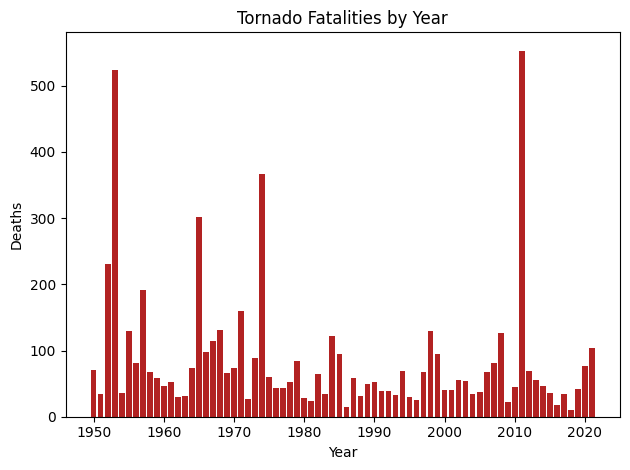

In [6]:
# Create a bar chart
plt.bar(df['year'], df['Total_Fatalities'], color='firebrick')

# Add labels
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Tornado Fatalities by Year')

# Show the plot
plt.tight_layout()
# Show the plot
plt.show()


In [7]:
query = text("""
                SELECT 
                    state, 
                    COUNT(*) AS tornado_count 
                FROM 
                    tornadoes 
                GROUP BY 
                    state 
                ORDER BY 
                    tornado_count desc
                LIMIT 20;
            """)
state_tornado_count_df = pd.read_sql(query, con=conn)
state_tornado_count_df 

,state,tornado_count
0,TX,9022
1,KS,4318
2,OK,4072
3,FL,3464
4,NE,2949
5,IA,2767
6,IL,2678
7,MS,2474
8,MO,2423
9,AL,2352


/var/folders/3v/z00xbwd10qq8nrh_v60w4g0m0000gn/T/ipykernel_20392/403328446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_tornado_count_df, x='state', y='tornado_count', palette='viridis')


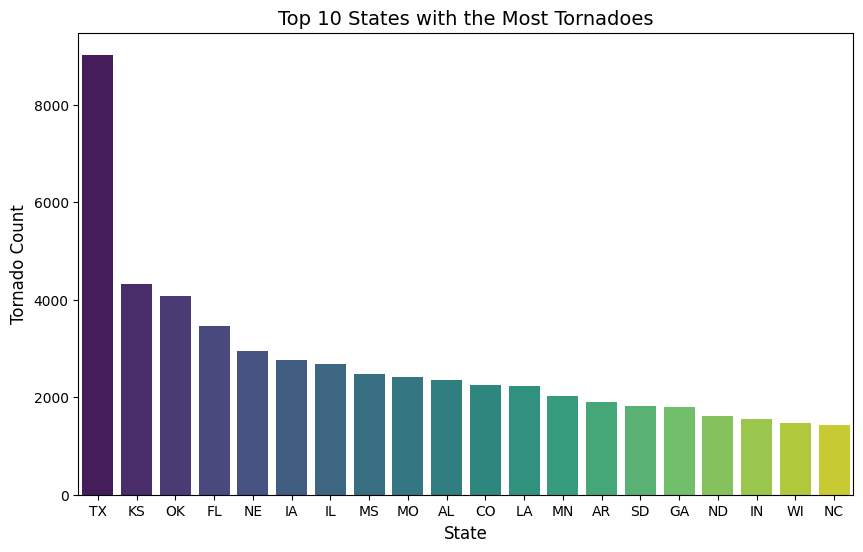

In [8]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(data=state_tornado_count_df, x='state', y='tornado_count', palette='viridis')

# Customizing the chart
plt.title('Top 10 States with the Most Tornadoes', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Tornado Count', fontsize=12)
  

# Show the plot
plt.show()

In [9]:
query = text("""
                SELECT 
                    year, 
                    COUNT(*) AS tornado_count 
                FROM 
                    tornadoes 
                GROUP BY 
                    year 
                ORDER BY 
                    tornado_count desc;
            """)
tornado_count_per_year_df = pd.read_sql(query, con=conn)
tornado_count_per_year_df.head(10)

,year,tornado_count
0,2004,1808
1,2011,1690
2,2008,1688
3,2019,1516
4,2017,1426
5,1998,1421
6,2003,1370
7,1999,1330
8,2021,1314
9,1992,1287


In [10]:
query = text("""SELECT 
                    month, 
                    COUNT(*) AS tornado_count
                FROM 
                    tornadoes
                GROUP BY 
                    month
                ORDER BY 
                    tornado_count DESC;""")
month_tornadoes_df = pd.read_sql(query, con=conn)
month_tornadoes_df

,month,tornado_count
0,5,14692
1,6,12345
2,4,9543
3,7,6904
4,8,4751
5,3,4505
6,9,3445
7,10,2790
8,11,2643
9,2,1942


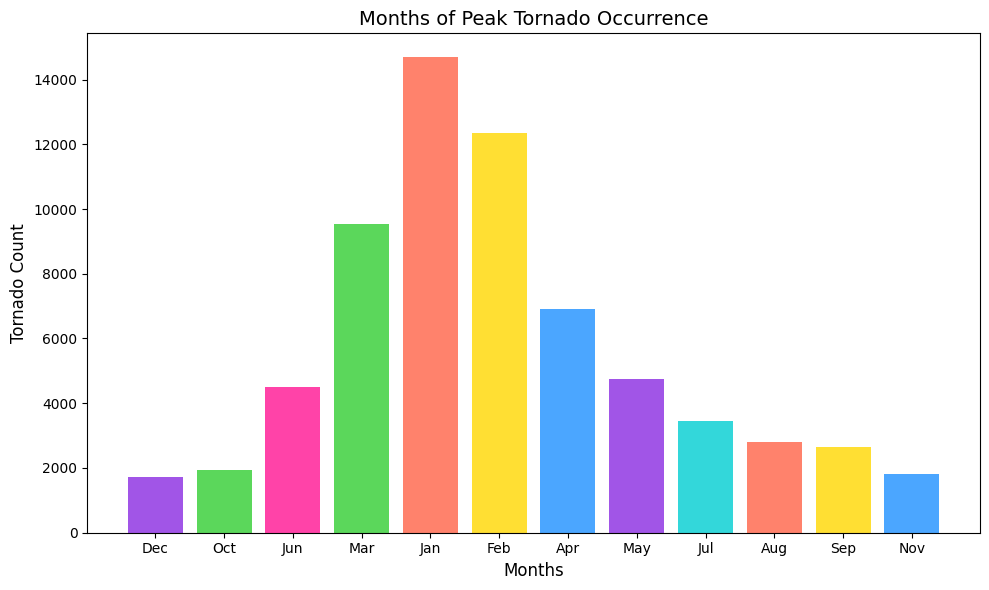

In [11]:
plt.figure(figsize=(10, 6))

# Set colors 
colors = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493', '#00CED1', 
          '#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2'] 

# List of month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Bar plot
plt.bar(month_tornadoes_df['month'], month_tornadoes_df['tornado_count'], color=colors, alpha=0.8)

# Customizing the chart
plt.title('Months of Peak Tornado Occurrence', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Tornado Count', fontsize=12)

# Set x-ticks to display month names
plt.xticks(month_tornadoes_df['month'], month_names)

# Show the plot
plt.tight_layout()
plt.show()




In [12]:
query = text("""
                SELECT 
                    year, 
                    tornado_magnitude,
                    start_latitude,
                    start_longitude,
                    state
                FROM 
                    tornadoes
                GROUP BY 
                    year 
                ORDER BY 
                    year asc;
            """)
map_df = pd.read_sql(query, con=conn)
map_df.head(10)


,year,tornado_magnitude,start_latitude,start_longitude,state
0,1950,3,39.10,-89.30,IL
1,1951,3,31.30,-92.47,LA
2,1952,2,41.60,-80.30,PA
3,1953,2,33.83,-92.17,AR
4,1954,1,33.38,-88.42,MS
5,1955,0,35.07,-97.93,OK
6,1956,3,35.20,-92.45,AR
7,1957,1,21.52,-158.07,HI
8,1958,1,28.25,-82.73,FL
9,1959,0,32.02,-90.63,MS


In [13]:
query = text("""SELECT * 
                FROM 
                    tornadoes 
                ORDER BY 
                    fatalities DESC 
                LIMIT 1;
            """)
fatalities_df = pd.read_sql(query, con=conn)
fatalities_df

,year,month,day,date,state,tornado_magnitude,injuries,fatalities,start_latitude,start_longitude,end_latitude,end_longitude,tornado_length,tornado_width
0,2011,5,22,2011-05-22,MO,5,1150,158,37.0524,-94.5932,36.9838,-94.2213,21.62,1600


In [14]:
# Bar chart or line chart showing the number of tornadoes per year.
query = text("""SELECT 
                    year, 
                    COUNT(*) AS total_tornadoes
                FROM 
                    tornadoes
                GROUP BY 
                    year
                ORDER BY 
                    year DESC
                LIMIT 10;""")
tornado_per_year_df = pd.read_sql(query, con=conn)
tornado_per_year_df

,year,total_tornadoes
0,2021,1314
1,2020,1082
2,2019,1516
3,2018,1125
4,2017,1426
5,2016,975
6,2015,1176
7,2014,884
8,2013,905
9,2012,938


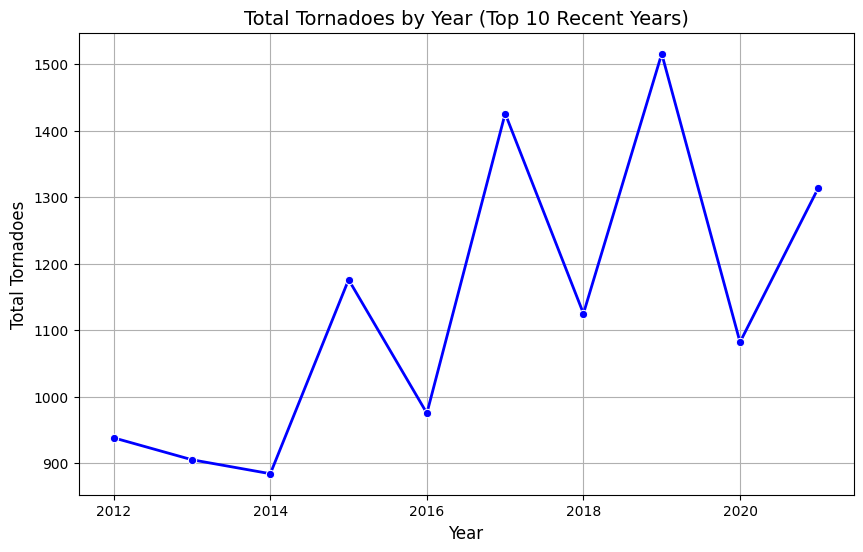

In [15]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Line plot
sns.lineplot(data=tornado_per_year_df, x='year', y='total_tornadoes', marker='o', color='b', linewidth=2)

# Customizing the chart
plt.title('Total Tornadoes by Year (Top 10 Recent Years)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Tornadoes', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [16]:
query = text("""SELECT 
                    month, COUNT(*) AS tornado_count
                FROM 
                    tornadoes
                WHERE 
                    year = 2021 and state = 'TX'
                GROUP BY 
                    month

            """)
tornado_count_df = pd.read_sql(query, con=conn)
tornado_count_df

,month,tornado_count
0,1,1
1,3,26
2,4,10
3,5,42
4,6,5
5,7,1
6,8,2
7,10,4
8,11,2
9,12,1


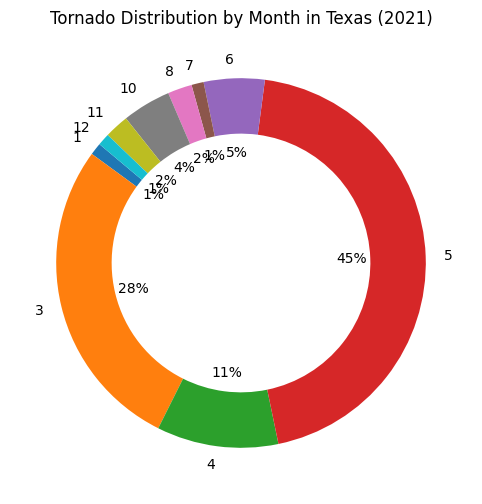

In [17]:
# Plotting the donut chart
plt.figure(figsize=(8, 6)) 

plt.pie(tornado_count_df['tornado_count'], 
        labels=tornado_count_df['month'],  
        autopct='%1.0f%%', 
        startangle=140,  
        wedgeprops={'width': 0.3})  

# Title 
plt.title('Tornado Distribution by Month in Texas (2021)')

# Display the chart
plt.show()

In [18]:
conn.close()
engine.dispose

<bound method Engine.dispose of Engine(sqlite:///data/database.db)>